In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [25]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
import cv2
import imghdr

C:\Users\234sa\AppData\Local\Temp\ipykernel_23008\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = 'data'

In [5]:
image_exts = ['jpeg','jpg','bmp','png']

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

Image not in ext list data\cats\list-of-top-10-cat-breeds.webp
Image not in ext list data\cats\PB232008-scaled.jpg
Image not in ext list data\cats\vector.svg
Image not in ext list data\cats\vector2.svg
Image not in ext list data\cats\vector3.svg
Image not in ext list data\cats\vector4.svg
Image not in ext list data\cats\vector5.svg
Image not in ext list data\cats\vector6.svg
Image not in ext list data\cats\vector7.svg
Image not in ext list data\cats\vector8.svg
Image not in ext list data\cats\vector9.svg
Image not in ext list data\dogs\GettyImages-654892254-e1689593598708.jpg


In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 284 files belonging to 2 classes.


In [22]:
data_iterator = data.as_numpy_iterator()

In [23]:
batch = data_iterator.next()

In [15]:
batch[0].shape

(32, 256, 256, 3)

In [16]:
batch[1]

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

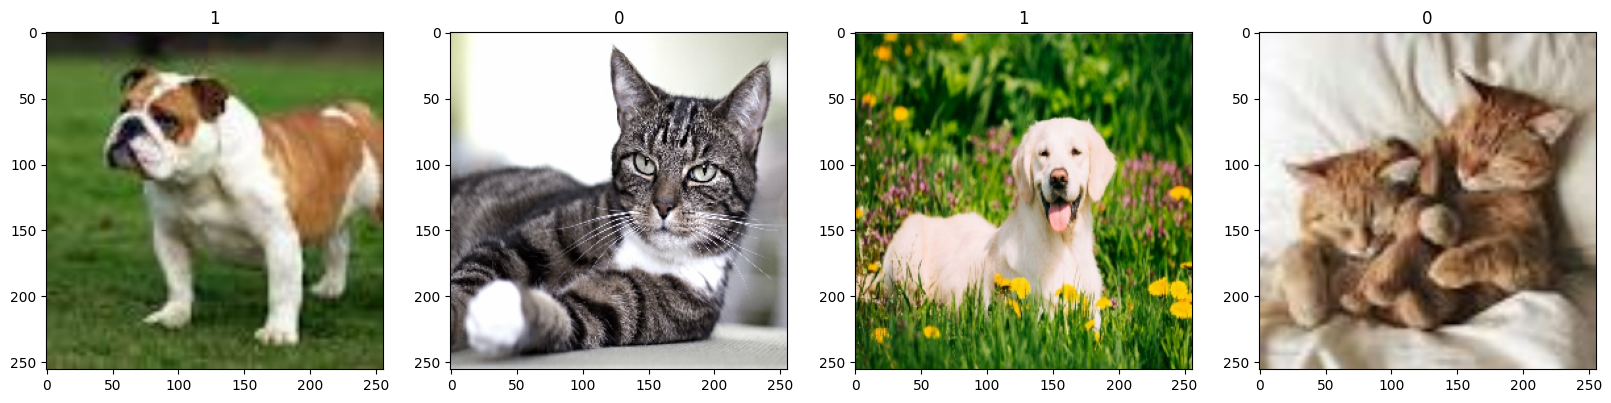

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [27]:
data = data.map(lambda x,y: (x/255, y))

In [28]:
data.as_numpy_iterator().next()

(array([[[[0.36078432, 0.29411766, 0.19126646],
          [0.36078432, 0.29411766, 0.18195465],
          [0.3631587 , 0.29649204, 0.17903838],
          ...,
          [0.7329351 , 0.66824925, 0.6215686 ],
          [0.73052716, 0.66111845, 0.6114248 ],
          [0.7249694 , 0.654136  , 0.59874386]],
 
         [[0.36078432, 0.29411766, 0.19215687],
          [0.36105144, 0.29438478, 0.18957472],
          [0.3634488 , 0.29678214, 0.18311983],
          ...,
          [0.70969576, 0.6395527 , 0.5858293 ],
          [0.7053922 , 0.6327752 , 0.57332164],
          [0.6984988 , 0.62472427, 0.559038  ]],
 
         [[0.35955882, 0.29289216, 0.19093138],
          [0.36098346, 0.2943168 , 0.18950674],
          [0.3634804 , 0.29681373, 0.1870098 ],
          ...,
          [0.6808125 , 0.6106311 , 0.547639  ],
          [0.6784764 , 0.60510206, 0.5335478 ],
          [0.6720282 , 0.5977635 , 0.51810664]],
 
         ...,
 
         [[0.6134172 , 0.5966969 , 0.23583506],
          [0.57728

In [29]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [33]:
train_size

6

In [34]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [35]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [37]:
model = Sequential()

In [38]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [41]:
logdir = 'logs'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/25
6/6 [==============================] - 23s 2s/step - loss: 1.1790 - accuracy: 0.5104 - val_loss: 0.6506 - val_accuracy: 0.5312
Epoch 2/25
6/6 [==============================] - 14s 2s/step - loss: 0.7128 - accuracy: 0.5104 - val_loss: 0.6867 - val_accuracy: 0.5312
Epoch 3/25
6/6 [==============================] - 15s 2s/step - loss: 0.6898 - accuracy: 0.5312 - val_loss: 0.6350 - val_accuracy: 0.5938
Epoch 4/25
6/6 [==============================] - 15s 2s/step - loss: 0.6307 - accuracy: 0.7240 - val_loss: 0.5492 - val_accuracy: 0.7500
Epoch 5/25
6/6 [==============================] - 14s 2s/step - loss: 0.5988 - accuracy: 0.6979 - val_loss: 0.6562 - val_accuracy: 0.4375
Epoch 6/25
6/6 [==============================] - 14s 2s/step - loss: 0.5267 - accuracy: 0.8073 - val_loss: 0.4450 - val_accuracy: 0.9375
Epoch 7/25
6/6 [==============================] - 14s 2s/step - loss: 0.4887 - accuracy: 0.7500 - val_loss: 0.4417 - val_accuracy: 0.8125
Epoch 8/25
6/6 [==================

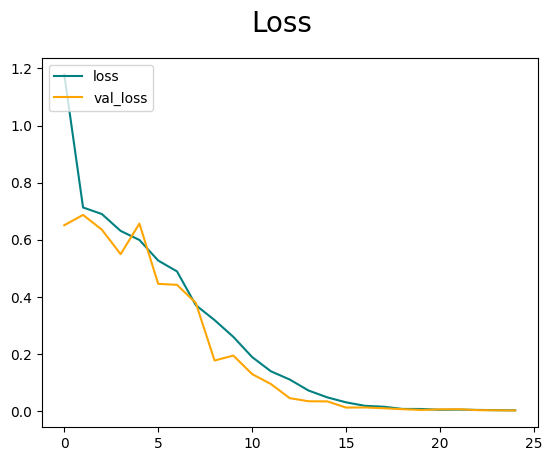

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

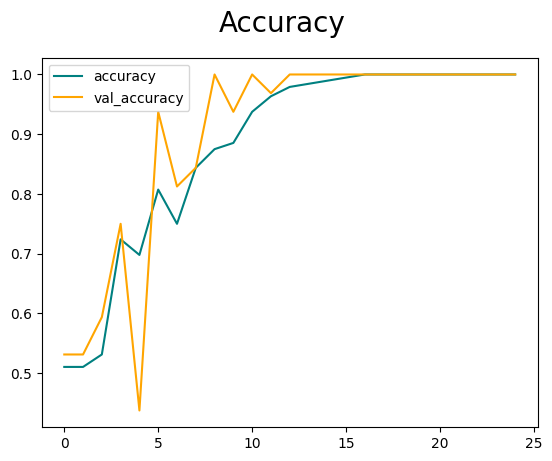

In [45]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [46]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [47]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [48]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [49]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


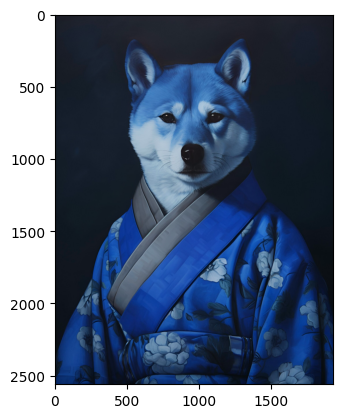

In [51]:
img = cv2.imread('cattest.jpg')
plt.imshow(img)
plt.show()

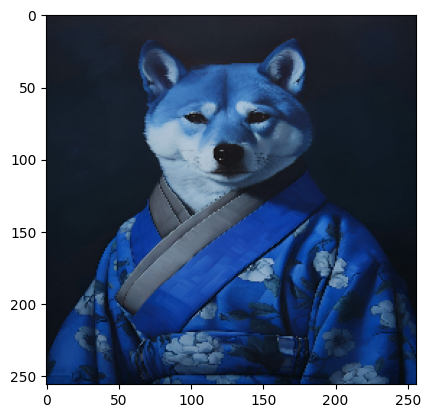

In [52]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [53]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 339ms/step


In [54]:
yhat

array([[0.00013397]], dtype=float32)

In [55]:
if yhat > 0.5: 
    print(f'Predicted class is cat')
else:
    print(f'Predicted class is dog')

Predicted class is dog


In [56]:
from tensorflow.keras.models import load_model

In [58]:
model.save(os.path.join('models','imageclassifier.h5'))

In [60]:
new_model = load_model('models/imageclassifier.h5')

In [61]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 134ms/step


array([[0.00013397]], dtype=float32)